Performance Comparison

Which instruments performed best/worst in the past term of risk and return?

Which stock is the best performer?

In [4]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.8f}'.format
import matplotlib.pyplot as plt

In [6]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close = close.drop(columns=["BTC=USD"])
close

,BA,DJI,EURUSD=X,GC=F,MSFT
Date,,,,,
2014-10-01 00:00:00+00:00,124.66999817,16804.69921875,1.26283360,1214.59997559,45.90000153
2014-10-02 00:00:00+00:00,124.16999817,16801.09960938,1.26241910,1214.19995117,45.75999832
2014-10-03 00:00:00+00:00,126.36000061,17009.69921875,1.26705778,1192.19995117,46.09000015
2014-10-06 00:00:00+00:00,126.26000214,16991.90039062,1.25136077,1206.69995117,46.09000015
2014-10-07 00:00:00+00:00,123.31999969,16719.40039062,1.26460624,1211.69995117,45.52999878
...,...,...,...,...,...
2021-05-24 00:00:00+00:00,237.44000244,34394.00000000,1.21832359,1884.59997559,250.77999878
2021-05-25 00:00:00+00:00,240.74000549,34312.50000000,1.22146356,1898.09997559,251.72000122
2021-05-26 00:00:00+00:00,241.36999512,34323.10156250,1.22490931,1901.30004883,251.49000549


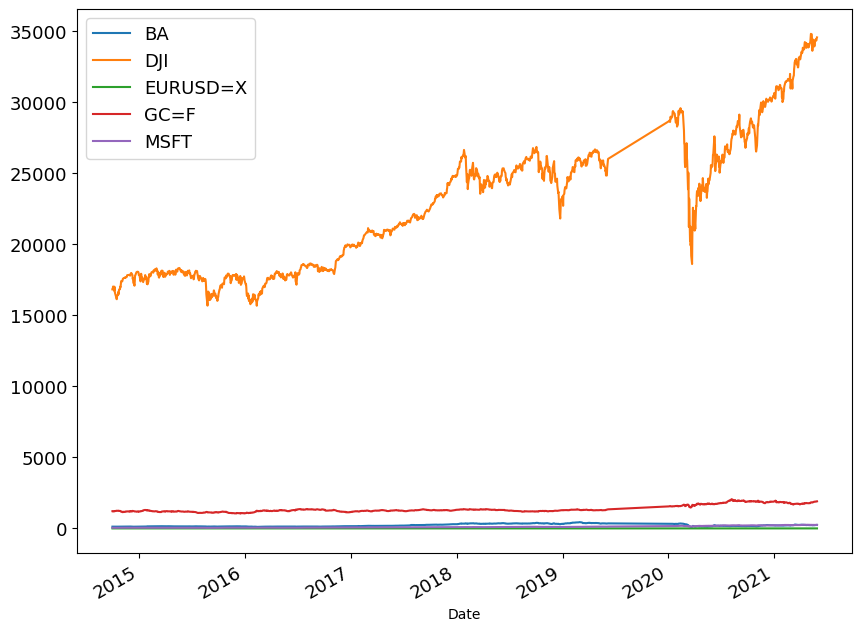

In [8]:
close.dropna().plot(figsize = (10, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [9]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1738 entries, 2014-10-01 00:00:00+00:00 to 2021-05-28 00:00:00+00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   DJI       1517 non-null   float64
 2   EURUSD=X  1735 non-null   float64
 3   GC=F      1674 non-null   float64
 4   MSFT      1677 non-null   float64
dtypes: float64(5)
memory usage: 81.5 KB


In [10]:
np.log(close / close.shift()).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1738 entries, 2014-10-01 00:00:00+00:00 to 2021-05-28 00:00:00+00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1615 non-null   float64
 1   DJI       1446 non-null   float64
 2   EURUSD=X  1731 non-null   float64
 3   GC=F      1609 non-null   float64
 4   MSFT      1615 non-null   float64
dtypes: float64(5)
memory usage: 81.5 KB


In [14]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1738 entries, 2014-10-01 00:00:00+00:00 to 2021-05-28 00:00:00+00:00
Freq: B
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   DJI       1516 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
dtypes: float64(5)
memory usage: 81.5 KB


In [16]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,DJI,EURUSD=X,GC=F,MSFT
Date,,,,,
2014-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-10-02 00:00:00+00:00,-0.00401865,-0.00021423,-0.00032828,-0.00032940,-0.00305484
2014-10-03 00:00:00+00:00,0.01748340,0.01233939,0.00366770,-0.01828508,0.00718570
2014-10-06 00:00:00+00:00,-0.00079169,-0.00104694,-0.01246592,0.01208902,0.00000000
2014-10-07 00:00:00+00:00,-0.02356069,-0.01616704,0.01052922,0.00413497,-0.01222459
...,...,...,...,...,...
2021-05-24 00:00:00+00:00,0.01109568,0.00542842,-0.00345380,0.00420069,0.02262422
2021-05-25 00:00:00+00:00,0.01380257,-0.00237241,0.00257397,0.00713779,0.00374131
2021-05-26 00:00:00+00:00,0.00261347,0.00030892,0.00281703,0.00168452,-0.00091411


In [18]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1738 entries, 2014-10-01 00:00:00+00:00 to 2021-05-28 00:00:00+00:00
Freq: B
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   DJI       1516 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
dtypes: float64(5)
memory usage: 81.5 KB


In [20]:
returns.describe()

,BA,DJI,EURUSD=X,GC=F,MSFT
count,1676.00000000,1516.00000000,1734.00000000,1673.00000000,1676.00000000
mean,0.00040799,0.00047503,-0.00002022,0.00026823,0.00101057
std,0.02634284,0.01262853,0.00513099,0.00939510,0.01724883
min,-0.27244425,-0.13841824,-0.02814408,-0.05106938,-0.15945341
25%,-0.00922843,-0.00344769,-0.00306662,-0.00416305,-0.00619604
50%,0.00074540,0.00057575,-0.00000534,0.00025507,0.00091793
75%,0.01045106,0.00546586,0.00289575,0.00510864,0.00906877
max,0.21767748,0.10764438,0.02814535,0.05777508,0.13292898


In [22]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.00040799,0.02634284
DJI,0.00047503,0.01262853
EURUSD=X,-0.00002022,0.00513099
GC=F,0.00026823,0.00939510
MSFT,0.00101057,0.01724883


In [27]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.00040799,0.02634284
DJI,0.00047503,0.01262853
EURUSD=X,-0.00002022,0.00513099
GC=F,0.00026823,0.00939510
MSFT,0.00101057,0.01724883


In [29]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.00040799,0.02634284
DJI,0.00047503,0.01262853
EURUSD=X,-0.00002022,0.00513099
GC=F,0.00026823,0.00939510
MSFT,0.00101057,0.01724883
